# K-Armed Bandit TestBed

Greedy , Epsilon Greedy ,Decaying Epsilon Greedy ,  UCB1 are implemented to solve the K-Armed Bandit problem . 2000 K-Armed Bandits are choosen k = 10 for every bandit and averaging is performed.
The true action value $q_*$ comes from a normal distribution with mean 0 and variance 1 

In [25]:
import numpy as np 
import matplotlib.pyplot as plt 
import sys

In [26]:
class k_armed_bandit:
    def __init__(self , k : int = 10 , plot_bandit_distribution : bool = False) -> None:
        """
        @Paramters 
        k : Number of Bandits 
        plot_dsitribution : Boolean to visualize actual distribution of each bandit 
        
        @Doc 
        True action value for each action depending on the number of bandits samples from a normal distribution with mean 0 and 
        variance 1       
        
        """
        self.num_bandits = k 
        self.true_action_values = np.random.normal(0 , 1 , 10)
        if(plot_bandit_distribution):
            reward_distribution = [ np.random.normal(action_value , 1 , 2000) for action_value in self.true_action_values]
            plt.violinplot(reward_distribution , showmeans = True)
            plt.axhline(y = 0 , color = "gray" , linestyle="--")
            plt.xticks(np.arange(0 ,self.num_bandits + 1))
            plt.xlabel("Action")
            plt.ylabel("Reward Distribution")
            plt.show()
    def step(self, action : int) -> float:
        """
        @parameters
        action : Which bandit to play 
        
        @returns
        samples rewards after taking the action 
        """
        assert action >= 0 and action < self.num_bandits
        reward = np.random.normal(self.true_action_values[action] , 1 , 1)
        return reward[0]
        

In [34]:
reward_dict = dict()
optimal_actions_dict = dict()

In [70]:
def plot_avg_rewards(rewards_dict : dict) -> None:
    fig = plt.figure()
    for agent,reward in rewards_dict.items():
        reward = np.array(reward)
        reward = np.mean(reward , axis = 0)
        total_time = reward.shape[0]
        plt.plot(np.arange(1,  total_time + 1) , reward , label = agent)
    plt.xlabel("Steps")
    plt.ylabel("Avg Rewards")
    plt.legend()
    plt.show()
    
def plot_optimal_actions(optimal_dict : dict) -> None:
    fig = plt.figure()
    for agent,optimal_action in optimal_dict.items():
        optimal_action = np.array(optimal_action)
        optimal_action = np.mean(optimal_action , axis = 0) * 100 
        total_time = optimal_action.shape[0]
        plt.plot(np.arange(1 , total_time + 1), optimal_action , label=agent)
    plt.xlabel("Steps")
    plt.ylabel("% Optimal Action")
    plt.legend()
    plt.show()


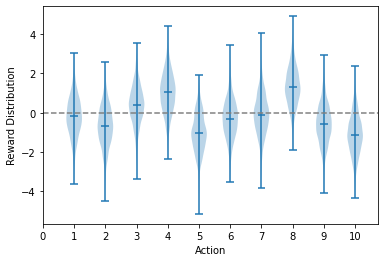

In [42]:
k_armed_bandit(plot_bandit_distribution = True)

## Greedy Algorithms

<img src="greedy.png" alt="Greedy Algorithm Image" width="500">

In [43]:
# define the greedy algorithm class

class greedy:
    def __init__ (self, env : k_armed_bandit) -> None:
        self.env = env
        self.num_bandits = env.num_bandits
        self.action_count = np.zeros(self.num_bandits)
        self.q= np.zeros(self.num_bandits)
    def update_q_values(self ,action : int , reward : float) -> None:
        self.action_count[action] = self.action_count[action] + 1
        self.q[action] = self.q[action] + (1.0/self.action_count[action]) * (reward - self.q[action])
        
    def choose_action(self) -> int:
        action = np.argmax(self.q)
        return action
    

In [35]:
#Plotting the results for Greedy Strategy 

num_episodes = 2000 
max_num_steps = 1000

all_rewards = []
all_optimal_values = []


for episode in range(num_episodes):
    if((episode + 1) % 10 == 0):
        # \r moves the cursor to the first place and end specifies we won't move to new line
        print("\rEpisode {}/{}.".format(episode + 1, num_episodes) ,  end = "")
        sys.stdout.flush 
    env = k_armed_bandit()
    agent = greedy(env)
    reward_ = []
    optimal_action = []
    for step in range(max_num_steps):
        action = agent.choose_action()
        reward = env.step(action)
        agent.update_q_values(action , reward)
        reward_.append(reward)
        if(action == np.argmax(env.true_action_values)):
            optimal_action.append(1)
        else:
            optimal_action.append(0)
    all_rewards.append(reward_)
    all_optimal_values.append(optimal_action)


reward_dict["greedy_agent"] = all_rewards
optimal_actions_dict["greedy_agent"] = all_optimal_values

Episode 2000/2000.

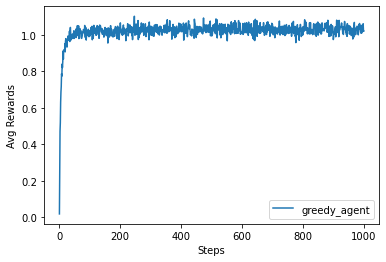

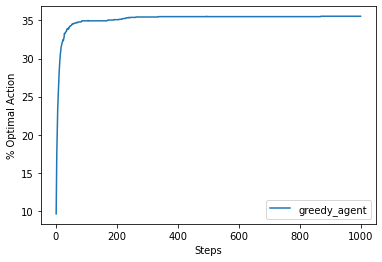

In [46]:
plot_avg_rewards(reward_dict)
plot_optimal_actions(optimal_actions_dict)

# Epsilon Greedy 

<img src="epsilon_greedy.png" alt="Epsilon Greedy Algorithm" width="500">

In [75]:
# Defining the class for Epsilon-Greedy 
class epsilon_greedy:
    def __init__(self , env : k_armed_bandit , epsilon) -> None:
        self.env = env
        self.num_bandits = env.num_bandits
        self.q = np.zeros(self.num_bandits)
        self.num_actions = np.zeros(self.num_bandits)
        self.epsilon = epsilon 
    
    def choose_action(self) -> int:
        alpha = np.random.random(1)[0]
        if(alpha < self.epsilon):
            action = np.random.randint(0 , self.num_bandits)
        else:
            best_q = np.max(self.q)
            action = np.random.choice(np.where(self.q == best_q)[0])
        return action
        
    def update_q(self , action : int , reward : float) -> None:
        self.num_actions[action] = self.num_actions[action] + 1
        self.q[action] = self.q[action] + (1/self.num_actions[action]) * (reward - self.q[action])

In [76]:
# Epsilon Greedy with Epsilon 0.01
num_episodes = 2000
num_steps = 1000

all_rewards = []
all_optimal_solutions = []

for episode in range(num_episodes):
    if ((episode + 1) % 10 == 0):
        print("\rEpisode {}/{}.".format(episode +1  , num_episodes) , end="")
        sys.stdout.flush()
    env= k_armed_bandit() 
    agent = epsilon_greedy(env , 0.01)
    reward_ = []
    optimal_solution = []
    for step in range(num_steps):
        action = agent.choose_action()
        reward = env.step(action)
        agent.update_q(action , reward)
        reward_.append(reward)
        if (action == np.argmax(env.true_action_values)):
            optimal_solution.append(1)
        else:
            optimal_solution.append(0)
    all_rewards.append(reward_)
    all_optimal_solutions.append(optimal_solution)


reward_dict["eps(0.01)_greedy_agent"] = all_rewards
optimal_actions_dict["eps(0.01)_greedy_agent"] = all_optimal_solutions

Episode 2000/2000.

In [77]:
# Epsilon Greedy with Epsilon 0.1
num_episodes = 2000
num_steps = 1000

all_rewards = []
all_optimal_solutions = []

for episode in range(num_episodes):
    if ((episode + 1) % 10 == 0):
        print("\rEpisode {}/{}.".format(episode +1  , num_episodes) , end="")
        sys.stdout.flush()
    env= k_armed_bandit() 
    agent = epsilon_greedy(env , 0.1)
    reward_ = []
    optimal_solution = []
    for step in range(num_steps):
        action = agent.choose_action()
        reward = env.step(action)
        agent.update_q(action , reward)
        reward_.append(reward)
        if (action == np.argmax(env.true_action_values)):
            optimal_solution.append(1)
        else:
            optimal_solution.append(0)
    all_rewards.append(reward_)
    all_optimal_solutions.append(optimal_solution)


reward_dict["eps(0.1)_greedy_agent"] = all_rewards
optimal_actions_dict["eps(0.1)_greedy_agent"] = all_optimal_solutions

Episode 2000/2000.

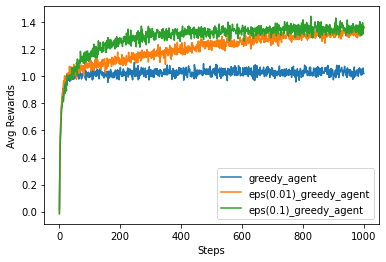

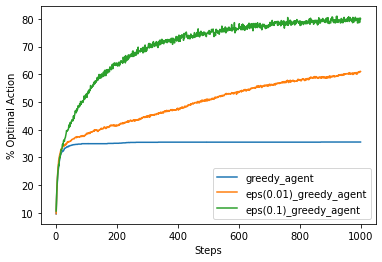

In [78]:
plot_avg_rewards(reward_dict)
plot_optimal_actions(optimal_actions_dict)

# Decaying Epsilon Greedy 

<img src="decayingEp.png" alt="Decaying Eps greedy" width="500">

In [87]:
class decaying_epsilon_greedy:
    def __init__(self , env : k_armed_bandit , min_epsilon : float , max_epsilon : float  , decay : float) -> None:
        self.env = env
        self.action_count = np.zeros(self.env.num_bandits)
        self.q = np.zeros(self.env.num_bandits)
        self.eps = max_epsilon
        self.min_eps = min_epsilon 
        self.num_bandits = self.env.num_bandits
        self.decay = decay
    def choose_action(self) -> int:
        alpha = np.random.random(1)[0]
        if (alpha < self.eps):
            action = np.random.randint(0 , self.num_bandits)
        else:
            best_q = np.max(self.q)
            action = np.random.choice(np.where(self.q == best_q)[0])
        self.eps = min(self.min_eps , self.eps * self.decay)
        return action 
    def update_q(self, action : int , reward : float):
        self.action_count[action] = self.action_count[action] + 1
        self.q[action] = self.q[action] + (1/ self.action_count[action]) * (reward - self.q[action])

In [98]:
# Deacying Eps greedy
num_episodes = 2000
num_steps = 1000

all_rewards = []
all_optimal_solutions = []

for episode in range(num_episodes):
    if ((episode + 1) % 10 == 0):
        print("\rEpisode {}/{}.".format(episode +1  , num_episodes) , end="")
        sys.stdout.flush()
    env= k_armed_bandit() 
    agent = decaying_epsilon_greedy(env ,0.1 , 1, 0.999)
    reward_ = []
    optimal_solution = []
    for step in range(num_steps):
        action = agent.choose_action()
        reward = env.step(action)
        agent.update_q(action , reward)
        reward_.append(reward)
        if (action == np.argmax(env.true_action_values)):
            optimal_solution.append(1)
        else:
            optimal_solution.append(0)
    all_rewards.append(reward_)
    all_optimal_solutions.append(optimal_solution)


reward_dict["decaying_greedy_agent"] = all_rewards
optimal_actions_dict["decaying_greedy_agent"] = all_optimal_solutions

Episode 2000/2000.

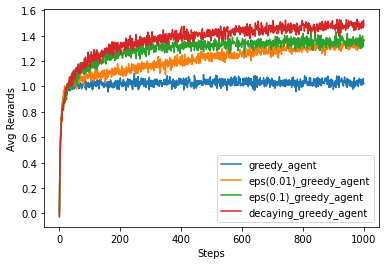

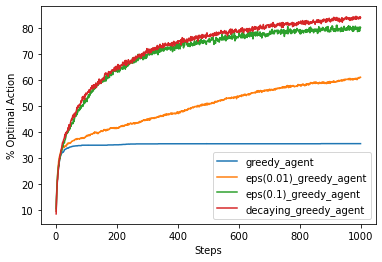

In [89]:
plot_avg_rewards(reward_dict)
plot_optimal_actions(optimal_actions_dict)

# UCB1 (Upper Confidence Bound -1 )

<img src="UCB1.png" alt="Upper Confidence Bound" width="500">

In [100]:
class ucb1:
    def __init__(self , env : k_armed_bandit) -> None:
        self.env = env
        self.action_count = np.zeros(self.env.num_bandits)
        self.q = np.zeros(self.env.num_bandits)
        self.num_bandit = env.num_bandits
        self.time = 1
    
    def choose_action(self) -> int:
        action_ucb = self.q + np.sqrt((2 * np.log(self.time)) / (self.action_count + 1e-10))
        best_action = np.max(action_ucb)
        action = np.random.choice(np.where(action_ucb == best_action)[0])
        return action 
    def update_q(self , action : int , reward : float)-> None:
        self.action_count[action] = self.action_count[action] + 1
        self.time += 1
        self.q[action] = self.q[action] + (1/self.action_count[action]) * (reward - self.q[action])        

In [101]:
# Deacying Eps greedy
num_episodes = 2000
num_steps = 1000

all_rewards = []
all_optimal_solutions = []

for episode in range(num_episodes):
    if ((episode + 1) % 10 == 0):
        print("\rEpisode {}/{}.".format(episode +1  , num_episodes) , end="")
        sys.stdout.flush()
    env= k_armed_bandit() 
    agent = ucb1(env)
    reward_ = []
    optimal_solution = []
    for step in range(num_steps):
        action = agent.choose_action()
        reward = env.step(action)
        agent.update_q(action , reward)
        reward_.append(reward)
        if (action == np.argmax(env.true_action_values)):
            optimal_solution.append(1)
        else:
            optimal_solution.append(0)
    all_rewards.append(reward_)
    all_optimal_solutions.append(optimal_solution)


reward_dict["UCB1"] = all_rewards
optimal_actions_dict["UCB1"] = all_optimal_solutions

Episode 2000/2000.

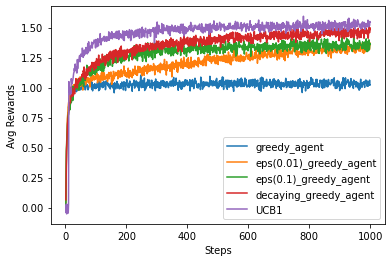

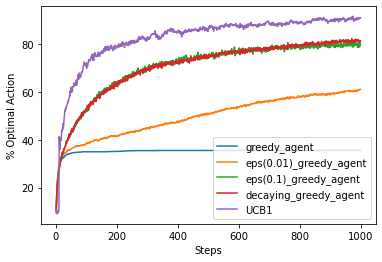

In [102]:
plot_avg_rewards(reward_dict)
plot_optimal_actions(optimal_actions_dict)